# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url ={
        "appid":weather_api_key,
        "lon":lngs[i],
        "lat":lats[i],
        "units":"metric"
    }
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(url,params=city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | guerrero negro
City not found. Skipping...
Processing Record 2 of Set 1 | lihue
City not found. Skipping...
Processing Record 3 of Set 1 | waitangi
City not found. Skipping...
Processing Record 4 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 5 of Set 1 | puerto natales
City not found. Skipping...
Processing Record 6 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 7 of Set 1 | san patricio
City not found. Skipping...
Processing Record 8 of Set 1 | namtsy
City not found. Skipping...
Processing Record 9 of Set 1 | tanjung selor
Processing Record 10 of Set 1 | mammoth lakes
Processing Record 11 of Set 1 | selfoss
Processing Record 12 of Set 1 | vilyuchinsk
City not found. Skipping...
Processing Record 13 of Set 1 | yellowknife
City not found. Skipping...
Processing Record 14 of Set 1 | praia
City not found. Skipping...
Processing Record 15 of Set 1 | st. john's
Cit

City not found. Skipping...
Processing Record 30 of Set 3 | faya-largeau
Processing Record 31 of Set 3 | sitka
City not found. Skipping...
Processing Record 32 of Set 3 | west island
City not found. Skipping...
Processing Record 33 of Set 3 | constantia
Processing Record 34 of Set 3 | callao
City not found. Skipping...
Processing Record 35 of Set 3 | itoman
City not found. Skipping...
Processing Record 36 of Set 3 | udachny
City not found. Skipping...
Processing Record 37 of Set 3 | albany
Processing Record 38 of Set 3 | gostagayevskaya
City not found. Skipping...
Processing Record 39 of Set 3 | hawaiian paradise park
City not found. Skipping...
Processing Record 40 of Set 3 | tranovaho
City not found. Skipping...
Processing Record 41 of Set 3 | lompoc
City not found. Skipping...
Processing Record 42 of Set 3 | greymouth
City not found. Skipping...
Processing Record 43 of Set 3 | longyearbyen
Processing Record 44 of Set 3 | soto la marina
City not found. Skipping...
Processing Record 4

Processing Record 16 of Set 6 | lazaro cardenas
City not found. Skipping...
Processing Record 17 of Set 6 | jacmel
City not found. Skipping...
Processing Record 18 of Set 6 | victoria point
City not found. Skipping...
Processing Record 19 of Set 6 | wittstock
City not found. Skipping...
Processing Record 20 of Set 6 | kurchatov
City not found. Skipping...
Processing Record 21 of Set 6 | portland
City not found. Skipping...
Processing Record 22 of Set 6 | uturoa
Processing Record 23 of Set 6 | prince rupert
Processing Record 24 of Set 6 | digapahandi
City not found. Skipping...
Processing Record 25 of Set 6 | tweed heads
City not found. Skipping...
Processing Record 26 of Set 6 | colonia
City not found. Skipping...
Processing Record 27 of Set 6 | altay
City not found. Skipping...
Processing Record 28 of Set 6 | i-n-salah
City not found. Skipping...
Processing Record 29 of Set 6 | heber springs
Processing Record 30 of Set 6 | yung shue wan
City not found. Skipping...
Processing Record 31

Processing Record 46 of Set 8 | saint-francois
City not found. Skipping...
Processing Record 47 of Set 8 | gurupi
City not found. Skipping...
Processing Record 48 of Set 8 | portales
Processing Record 49 of Set 8 | bamboo flat
City not found. Skipping...
Processing Record 0 of Set 9 | huocheng
City not found. Skipping...
Processing Record 1 of Set 9 | kelaat mgouna
City not found. Skipping...
Processing Record 2 of Set 9 | sabak bernam
City not found. Skipping...
Processing Record 3 of Set 9 | yanbu
City not found. Skipping...
Processing Record 4 of Set 9 | grantsville
City not found. Skipping...
Processing Record 5 of Set 9 | arno
Processing Record 6 of Set 9 | plastun
Processing Record 7 of Set 9 | hancheng
Processing Record 8 of Set 9 | kirkham
City not found. Skipping...
Processing Record 9 of Set 9 | holualoa
Processing Record 10 of Set 9 | port glaud
City not found. Skipping...
Processing Record 11 of Set 9 | ngara
Processing Record 12 of Set 9 | presidente medici
City not found.

City not found. Skipping...
Processing Record 27 of Set 11 | galesong
City not found. Skipping...
Processing Record 28 of Set 11 | wamba
City not found. Skipping...
Processing Record 29 of Set 11 | ismailia
Processing Record 30 of Set 11 | bumba
City not found. Skipping...
Processing Record 31 of Set 11 | siguiri
City not found. Skipping...
Processing Record 32 of Set 11 | frenda
City not found. Skipping...
Processing Record 33 of Set 11 | kayangel
City not found. Skipping...
Processing Record 34 of Set 11 | ceeldheer
City not found. Skipping...
Processing Record 35 of Set 11 | cadale
City not found. Skipping...
Processing Record 36 of Set 11 | puerto baquerizo moreno
City not found. Skipping...
Processing Record 37 of Set 11 | palikir - national government center
Processing Record 38 of Set 11 | dayapar
City not found. Skipping...
Processing Record 39 of Set 11 | labytnangi
City not found. Skipping...
Processing Record 40 of Set 11 | bereznik
City not found. Skipping...
Processing Rec

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          173
Lat           173
Lng           173
Max Temp      173
Humidity      173
Cloudiness    173
Wind Speed    173
Country       173
Date          173
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tanjung selor,64.7398,130.3775,12.76,95,100,0.26,RU,1688063577
1,mammoth lakes,2.5346,115.8790,18.05,100,100,0.20,ID,1688063578
2,selfoss,37.0308,-118.2832,26.88,21,0,2.63,US,1688063578
3,tiksi,53.1015,1.4270,20.18,71,4,2.60,GB,1688063585
4,wailua homesteads,71.1460,127.6348,2.18,80,100,4.91,RU,1688063585


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tanjung selor,64.7398,130.3775,12.76,95,100,0.26,RU,1688063577
1,mammoth lakes,2.5346,115.8790,18.05,100,100,0.20,ID,1688063578
2,selfoss,37.0308,-118.2832,26.88,21,0,2.63,US,1688063578
3,tiksi,53.1015,1.4270,20.18,71,4,2.60,GB,1688063585
4,wailua homesteads,71.1460,127.6348,2.18,80,100,4.91,RU,1688063585


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

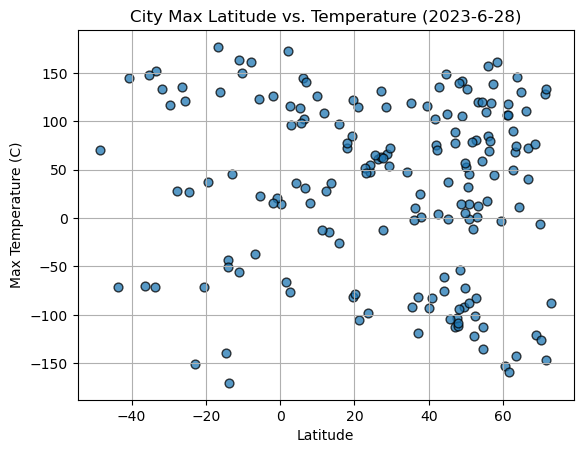

In [8]:
# Build scatter plot for latitude vs. temperature
x_axis=city_data_df["Lat"]
y_axis=city_data_df["Lng"]
plt.scatter(x_axis,y_axis,alpha=0.75,edgecolors='black',s=40)

#Incorporate the other graph properties
plt.grid(True)
plt.title("City Max Latitude vs. Temperature (2023-6-28)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

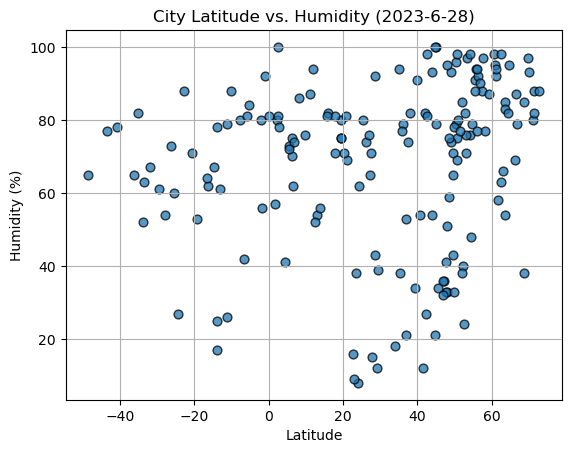

In [9]:
# Build the scatter plots for latitude vs. humidity
x_axis=city_data_df["Lat"]
y_axis=city_data_df["Humidity"]
plt.scatter(x_axis,y_axis,alpha=0.75,edgecolors='black',s=40)

# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitude vs. Humidity (2023-6-28)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

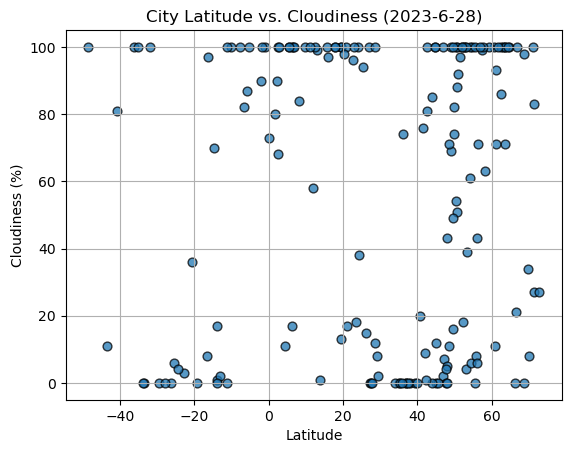

In [10]:
# Build the scatter plots for latitude vs. cloudiness
x_axis=city_data_df["Lat"]
y_axis=city_data_df["Cloudiness"]
plt.scatter(x_axis,y_axis,alpha=0.75,edgecolors='black',s=40)

# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitude vs. Cloudiness (2023-6-28)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
           
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

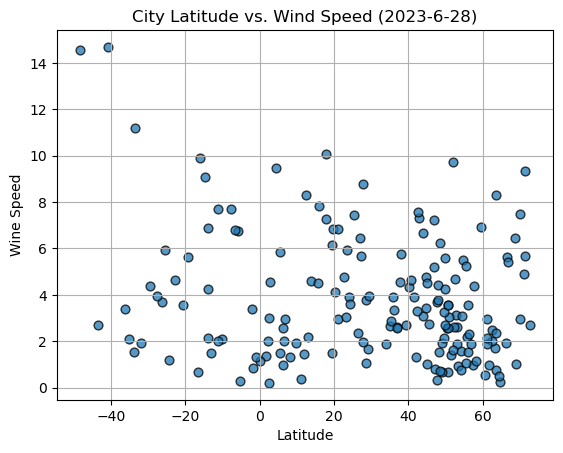

In [11]:
# Build the scatter plots for latitude vs. wind speed
x_axis=city_data_df["Lat"]
y_axis=city_data_df["Wind Speed"]
plt.scatter(x_axis,y_axis,alpha=0.75,edgecolors='black',s=40)

# Incorporate the other graph properties
plt.grid(True)
plt.title("City Latitude vs. Wind Speed (2023-6-28)")
plt.xlabel("Latitude")
plt.ylabel("Wine Speed")

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def linearregression (df,x_column,y_column):
    x_val=df[x_column]
    y_val=df[y_column]
    
#linear regression equation
    (slope,intercept,r_value,p_value,std_err)=linregress(x_val,y_val)
    
#scatter plot
    plt.scatter(x_val,y_val,alpha=0.75, edgecolors="black",s=40)
    plt.grid(True)
    plt.title(x_column+"vs."+y_column)
    plt.xlabel(x_column)
    plt.ylabel(y_column)

    
#regression line
    plt.plot(x_val,intercept+slope*x_val,color="black",label="Regression Line")
    
#print
    print(f"The R-Value Equals: {r_value}")
    plt.show()

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tanjung selor,64.7398,130.3775,12.76,95,100,0.26,RU,1688063577
1,mammoth lakes,2.5346,115.8790,18.05,100,100,0.20,ID,1688063578
2,selfoss,37.0308,-118.2832,26.88,21,0,2.63,US,1688063578
3,tiksi,53.1015,1.4270,20.18,71,4,2.60,GB,1688063585
4,wailua homesteads,71.1460,127.6348,2.18,80,100,4.91,RU,1688063585


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,saint-pierre,-33.5267,152.3437,12.50,63,0,11.18,AU,1688063587
18,atafu village,-7.7270,160.9416,28.03,80,100,7.71,SB,1688063617
19,zav'yalovo,-13.8737,-170.3046,27.55,78,17,6.90,AS,1688063618
21,hammerfest,-36.2865,-70.0482,-0.87,65,100,3.38,AR,1688063622
24,olonkinbyen,-16.1819,129.8528,19.71,62,97,9.92,AU,1688063628


###  Temperature vs. Latitude Linear Regression Plot

The R-Value Equals: -0.7236063313825396


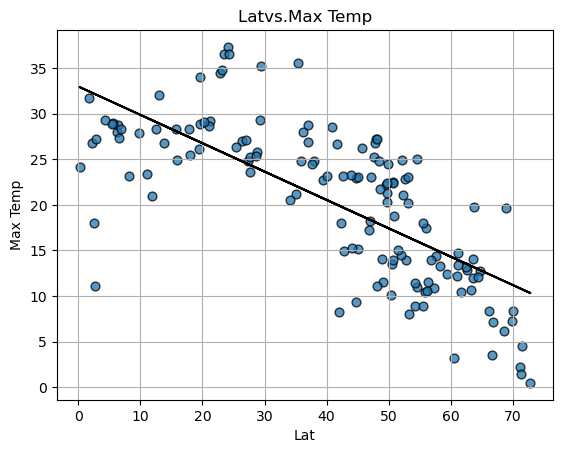

In [21]:
# Linear regression on Northern Hemisphere
linearregression(northern_hemi_df,"Lat","Max Temp")

The R-Value Equals: 0.8338569496813344


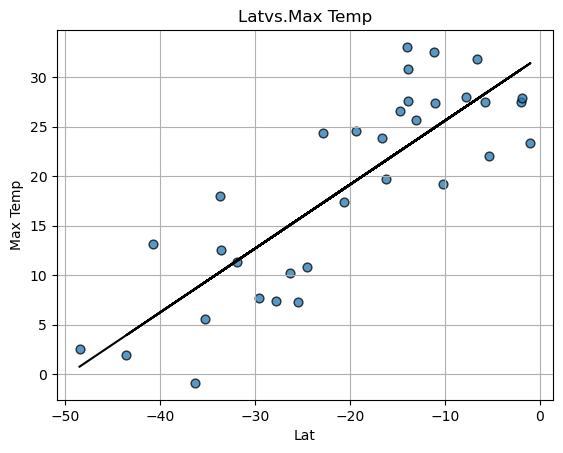

In [22]:
# Linear regression on Southern Hemisphere
linearregression(southern_hemi_df,"Lat","Max Temp")

**Discussion about the linear relationship:** According to the two linear relationships plotted, the Max Temp and Latitude seem to have opposite relationships when compared to Northern vs. Southern Hemispheres. For Northern, temp decreases as latitude increases and for Southern, temp increases as latitude increases. Ultimately, the closer to 0 latitude, the warmer the temperature.

### Humidity vs. Latitude Linear Regression Plot

The R-Value Equals: 0.17199877076445036


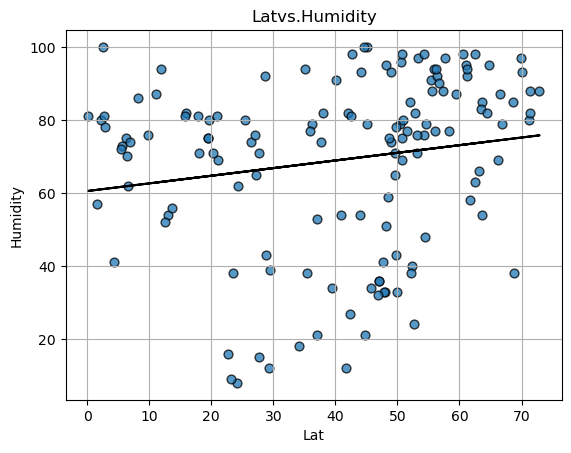

In [23]:
# Northern Hemisphere
linearregression(northern_hemi_df,"Lat","Humidity")

The R-Value Equals: 0.010313848163176485


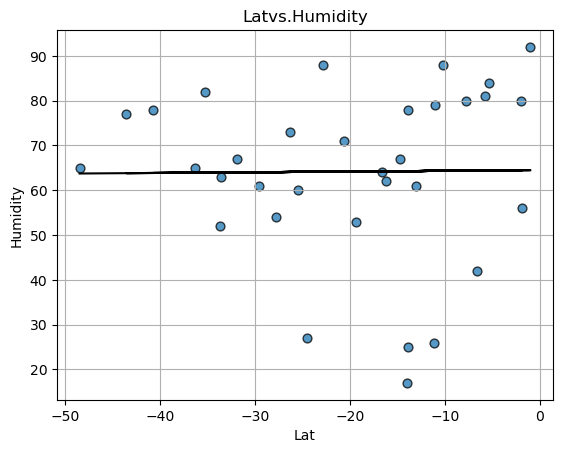

In [24]:
# Southern Hemisphere
linearregression(southern_hemi_df,"Lat","Humidity")

**Discussion about the linear relationship:** Similarly to the previous graphs on temp vs latitude, humidity seems to decrease as latitude reaches 0. This would support the notion that temp gets hotter because it correlates with humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The R-Value Equals: -0.08098885327440461


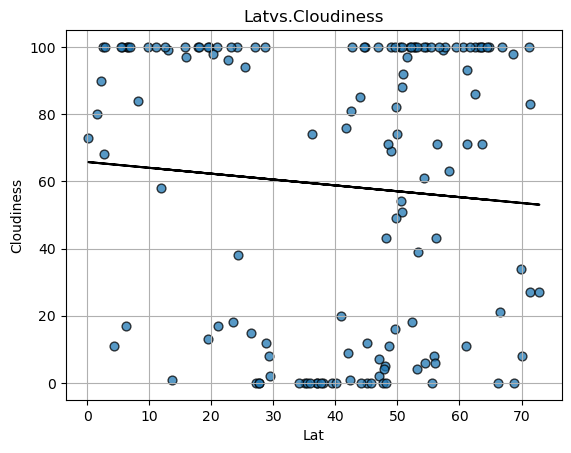

In [25]:
# Northern Hemisphere
linearregression(northern_hemi_df,"Lat","Cloudiness")

The R-Value Equals: 0.21898218522422624


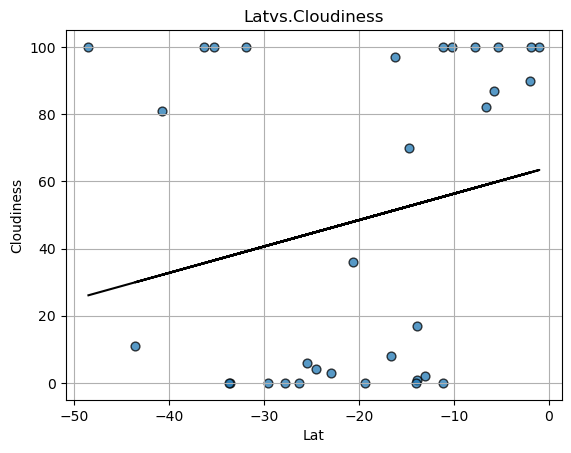

In [26]:
# Southern Hemisphere
linearregression(southern_hemi_df,"Lat","Cloudiness")

**Discussion about the linear relationship:** According to the two graphs, there is an increase in cloudiness as latitude approaches 0. There is a decrease in cloudiness as latitude increases or decreases past 0.

### Wind Speed vs. Latitude Linear Regression Plot

The R-Value Equals: -0.07568401408110323


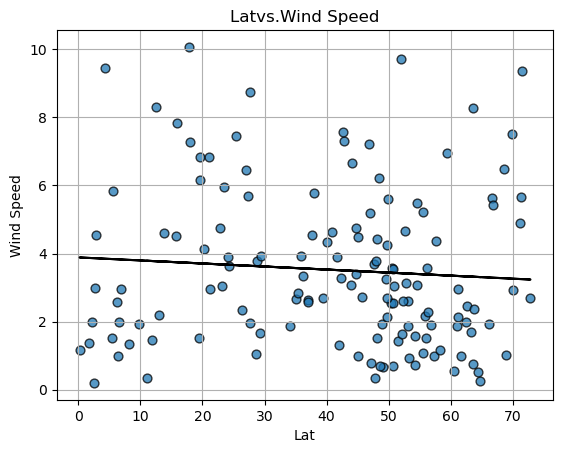

In [27]:
# Northern Hemisphere
linearregression(northern_hemi_df,"Lat","Wind Speed")

The R-Value Equals: -0.3296733470105677


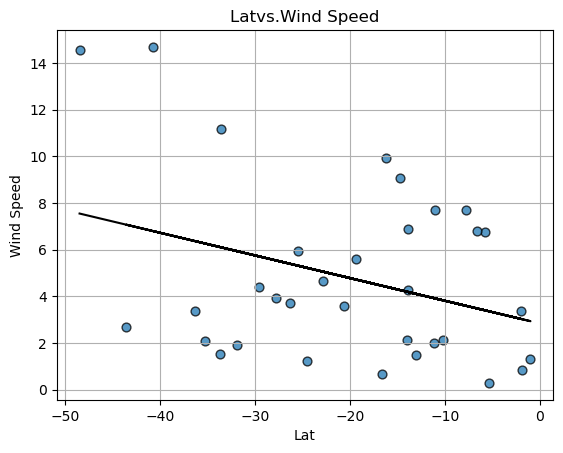

In [28]:
# Southern Hemisphere
linearregression(southern_hemi_df,"Lat","Wind Speed")

**Discussion about the linear relationship:** Although there is not a strong association of the Northern Hemisphere's wind speed vs. latitude up to 0, the Southern Hemisphere has increasing wind speed the further from 0 it gets. 